Version 25.09.2023, A. S. Lundervold.

[![Google Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/HVL-ML/DAT158/blob/master/notebooks/DAT158-1.5-Regression.ipynb)  &nbsp; [![kaggle](https://camo.githubusercontent.com/a08ca511178e691ace596a95d334f73cf4ce06e83a5c4a5169b8bb68cac27bef/68747470733a2f2f6b6167676c652e636f6d2f7374617469632f696d616765732f6f70656e2d696e2d6b6167676c652e737667)](https://www.kaggle.com/alexanderlundervold/2023-dat158-1-5-regression-ipynb)

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Setup" data-toc-modified-id="Setup-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Setup</a></span></li><li><span><a href="#Understand-the-problem-and-look-at-the-big-picture" data-toc-modified-id="Understand-the-problem-and-look-at-the-big-picture-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Understand the problem and look at the big picture</a></span><ul class="toc-item"><li><span><a href="#Frame-the-problem" data-toc-modified-id="Frame-the-problem-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Frame the problem</a></span></li><li><span><a href="#Select-performance-measures" data-toc-modified-id="Select-performance-measures-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Select performance measures</a></span></li></ul></li><li><span><a href="#Get-the-data" data-toc-modified-id="Get-the-data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Get the data</a></span></li><li><span><a href="#Explore-the-data" data-toc-modified-id="Explore-the-data-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Explore the data</a></span><ul class="toc-item"><li><span><a href="#Feature-distributions" data-toc-modified-id="Feature-distributions-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Feature distributions</a></span></li><li><span><a href="#Converting-the-features'-data-types" data-toc-modified-id="Converting-the-features'-data-types-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Converting the features' data types</a></span></li><li><span><a href="#Feature-encoding" data-toc-modified-id="Feature-encoding-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Feature encoding</a></span></li><li><span><a href="#Setting-up-our-$f:-X-\to-y$" data-toc-modified-id="Setting-up-our-$f:-X-\to-y$-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Setting up our $f: X \to y$</a></span></li></ul></li><li><span><a href="#Create-training-and-test-sets" data-toc-modified-id="Create-training-and-test-sets-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Create training and test sets</a></span></li><li><span><a href="#Data-preprocessing:-Data-cleaning,-feature-scaling-and-imputing-missing-data" data-toc-modified-id="Data-preprocessing:-Data-cleaning,-feature-scaling-and-imputing-missing-data-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Data preprocessing: Data cleaning, feature scaling and imputing missing data</a></span></li><li><span><a href="#Training-a-regression-model" data-toc-modified-id="Training-a-regression-model-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Training a regression model</a></span></li><li><span><a href="#Evaluating-models-/-performance-measures" data-toc-modified-id="Evaluating-models-/-performance-measures-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Evaluating models / performance measures</a></span><ul class="toc-item"><li><span><a href="#Mean-absolute-error" data-toc-modified-id="Mean-absolute-error-9.1"><span class="toc-item-num">9.1&nbsp;&nbsp;</span>Mean absolute error</a></span></li><li><span><a href="#Mean-squared-error-and-root-mean-squared-error" data-toc-modified-id="Mean-squared-error-and-root-mean-squared-error-9.2"><span class="toc-item-num">9.2&nbsp;&nbsp;</span>Mean squared error and root mean squared error</a></span></li><li><span><a href="#In-scikit-learn" data-toc-modified-id="In-scikit-learn-9.3"><span class="toc-item-num">9.3&nbsp;&nbsp;</span>In scikit learn</a></span></li></ul></li></ul></div>

# Introduction

This notebook serves as a hands-on guide to the foundational principles of **regression** in machine learning, illustrated with concrete examples.

We'll use two data sets for this, of increasing complexity: _vehicles_ and _housing prices_. This notebook goes through the _vehicles_ example. You'll study the housing data in Assignment #1.

<img src="https://github.com/HVL-ML/DAT158/raw/main/notebooks/assets/cars.jpg">

We'll also look at strategies and techniques for evaluating models beyond those explored in previous notebooks. 

# Setup

In [1]:
# This is a quick check of whether the notebook is currently running on Google Colaboratory
# or on Kaggle, as that makes some difference for the code below.
# We'll do this in every notebook of the course.
try:
    import colab
    colab=True
except:
    colab=False

import os
kaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')

In [2]:
if (colab or kaggle):
    !pip install --upgrade ydata-profiling

In [3]:
# To display plots directly in the notebook:
%matplotlib inline

We import our standard framework:

In [4]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import sklearn

In [5]:
# Set the directory in which to store data
NB_DIR = Path.cwd()     
DATA = NB_DIR/'data'/'vehicles'     

DATA.mkdir(parents=True, exist_ok=True)

# Understand the problem and look at the big picture

## Frame the problem

Our mission is to develop a model that accurately predicts a car's price based on various descriptive features. Whether you're a buyer looking for a fair deal or a seller setting a competitive price, such a model aims to offer valuable insights.

## Select performance measures

If we imagine that our model will be used as part of a more comprehensive pricing system, the broader picture may influence the performance measures we'd like to use.

In this case, we keep things simple: we just want the predicted price to, on average, correspond to the actual sale price. 

We've opted for **Root Mean Squared Error** (RMSE) and **Mean Absolute Error** (MAE) as our to measure model performance. These metrics are widely used, due to their effectiveness in quantifying the average discrepancies between predicted and actual values.

We'll talk more about these metrics later in the notebook. 

# Get the data

We'll use the data provided by Nehal Birla here: https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho.

We download the data it and place it in the `DATA` directory:

In [6]:
import shutil
from urllib.request import urlretrieve
from pathlib import Path

url = 'https://github.com/HVL-ML/DAT158/raw/main/notebooks/data/vehicles/archive.zip'
fn = DATA / 'archive.zip'
extract_dir = DATA

try:
    urlretrieve(url, fn)
    shutil.unpack_archive(fn, extract_dir=extract_dir)
except Exception as e:
    print(f"An error occurred: {e}")

There are three different data sets. Let's have a quick look at them to decide which one to use:

In [7]:
list(DATA.iterdir())

[WindowsPath('c:/Users/alexa/Dropbox/Jobb/HIB/Kurs/DAT158/DAT158-2023/notebooks/data/vehicles/archive.zip'),
 WindowsPath('c:/Users/alexa/Dropbox/Jobb/HIB/Kurs/DAT158/DAT158-2023/notebooks/data/vehicles/car data.csv'),
 WindowsPath('c:/Users/alexa/Dropbox/Jobb/HIB/Kurs/DAT158/DAT158-2023/notebooks/data/vehicles/CAR DETAILS FROM CAR DEKHO.csv'),
 WindowsPath('c:/Users/alexa/Dropbox/Jobb/HIB/Kurs/DAT158/DAT158-2023/notebooks/data/vehicles/Car details v3.csv')]

In [8]:
car_data = pd.read_csv('data/vehicles/car data.csv')
car_details = pd.read_csv('data/vehicles/CAR DETAILS FROM CAR DEKHO.csv')
car_details_v3 = pd.read_csv('data/vehicles/Car details v3.csv')

In [9]:
car_data.head()

Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0  
3      Dealer       Manual      0  
4      Dealer       Manual      0

In [10]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [11]:
car_details.head()

name  year  selling_price  km_driven    fuel  \
0             Maruti 800 AC  2007          60000      70000  Petrol   
1  Maruti Wagon R LXI Minor  2007         135000      50000  Petrol   
2      Hyundai Verna 1.6 SX  2012         600000     100000  Diesel   
3    Datsun RediGO T Option  2017         250000      46000  Petrol   
4     Honda Amaze VX i-DTEC  2014         450000     141000  Diesel   

  seller_type transmission         owner  
0  Individual       Manual   First Owner  
1  Individual       Manual   First Owner  
2  Individual       Manual   First Owner  
3  Individual       Manual   First Owner  
4  Individual       Manual  Second Owner

In [12]:
car_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [13]:
car_details_v3.head()

name  year  selling_price  km_driven    fuel  \
0        Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3     Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4        Maruti Swift VXI BSIII  2007         130000     120000  Petrol   

  seller_type transmission         owner     mileage   engine   max_power  \
0  Individual       Manual   First Owner   23.4 kmpl  1248 CC      74 bhp   
1  Individual       Manual  Second Owner  21.14 kmpl  1498 CC  103.52 bhp   
2  Individual       Manual   Third Owner   17.7 kmpl  1497 CC      78 bhp   
3  Individual       Manual   First Owner   23.0 kmpl  1396 CC      90 bhp   
4  Individual       Manual   First Owner   16.1 kmpl  1298 CC    88.2 bhp   

                     torque  seats  
0            190Nm@ 2000rpm    5.0  
1       250Nm@ 1500-2500rpm    5.0  
2     12.7@ 2,700(kgm@ rpm)    5.0  
3  22.4 kgm at 1750-2750rpm    5.0  
4     11.5@ 4,500(kgm@ rpm)    5.0

In [14]:
car_details_v3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


Let's use the last one as it has the most features and instances. Note that there are some missing values in `mileage`, `engine`, `max_power`, `torque` and `seats` that we'll have to deal with.

In [15]:
df = car_details_v3.copy()

# Explore the data

In [16]:
df.head()

name  year  selling_price  km_driven    fuel  \
0        Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3     Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4        Maruti Swift VXI BSIII  2007         130000     120000  Petrol   

  seller_type transmission         owner     mileage   engine   max_power  \
0  Individual       Manual   First Owner   23.4 kmpl  1248 CC      74 bhp   
1  Individual       Manual  Second Owner  21.14 kmpl  1498 CC  103.52 bhp   
2  Individual       Manual   Third Owner   17.7 kmpl  1497 CC      78 bhp   
3  Individual       Manual   First Owner   23.0 kmpl  1396 CC      90 bhp   
4  Individual       Manual   First Owner   16.1 kmpl  1298 CC    88.2 bhp   

                     torque  seats  
0            190Nm@ 2000rpm    5.0  
1       250Nm@ 1500-2500rpm    5.0  
2     12.7@ 2,700(kgm@ rpm)    5.0  
3  22.4 kgm at 1750-2750rpm    5.0  
4     11.5@ 4,500(kgm@ rpm)    5.0

## Feature distributions

Here's a plot of the price distribution in our data:

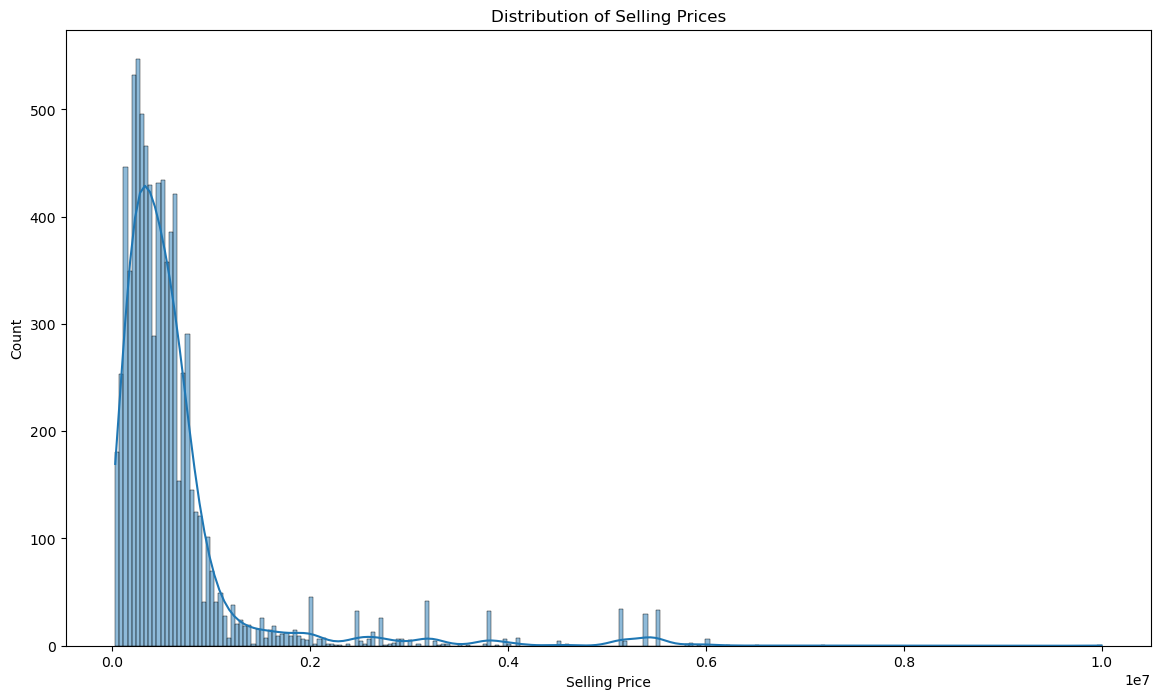

In [17]:
plt.figure(figsize=(14,8))
sns.histplot(df.selling_price, kde=True)
plt.xlabel('Selling Price')
plt.ylabel('Count')
plt.title('Distribution of Selling Prices')
plt.show()

The distribution reveals that while there are a few luxury cars that skew the price range, most cars in the dataset are relatively affordable.

How about the distribution of model years?

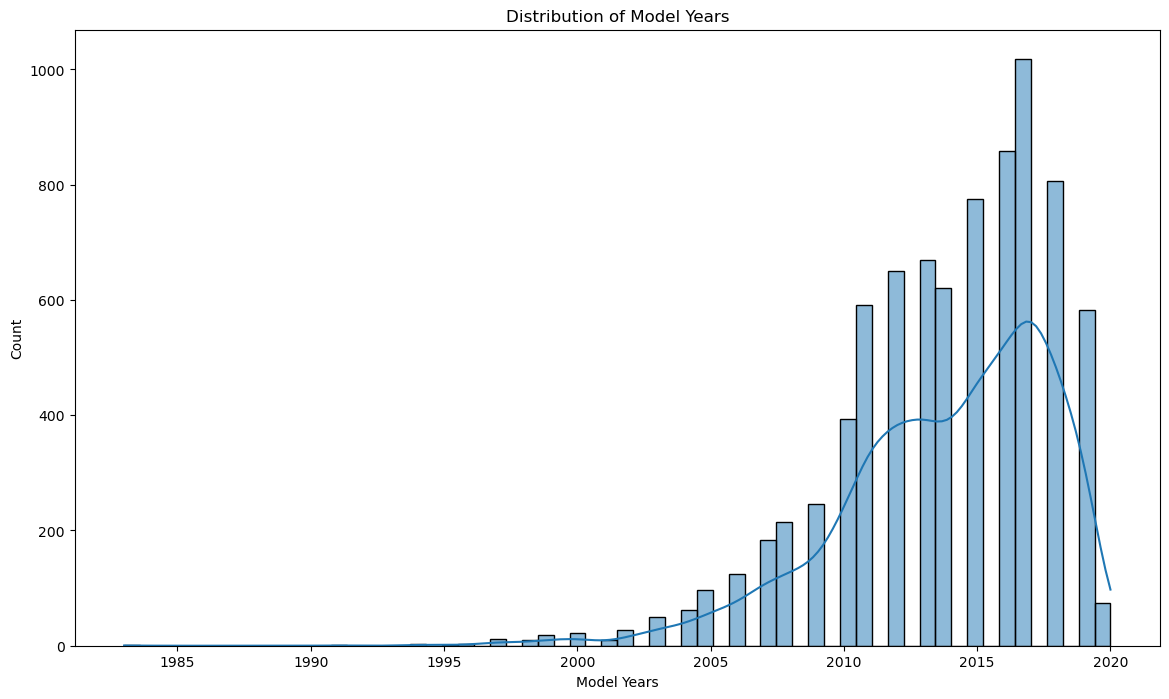

In [18]:
plt.figure(figsize=(14,8))
sns.histplot(df.year, kde=True)
plt.xlabel('Model Years')
plt.ylabel('Count')
plt.title('Distribution of Model Years')
plt.show()

We note that the cars are quite new.

Is there a relationship between the model year and the price? Let's make a new categorical feature to investigate. Based on the above histogram, we say that cars from before 2010 are "old", between 2010 and 2015 are "medium" and 2015-2020 are "new".

In [19]:
df["age_cat"] = pd.cut(df["year"], bins=[1982, 2010, 2015, 2020],
                               labels=['old', 'medium', 'new'])


In [20]:
df.head()

name  year  selling_price  km_driven    fuel  \
0        Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3     Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4        Maruti Swift VXI BSIII  2007         130000     120000  Petrol   

  seller_type transmission         owner     mileage   engine   max_power  \
0  Individual       Manual   First Owner   23.4 kmpl  1248 CC      74 bhp   
1  Individual       Manual  Second Owner  21.14 kmpl  1498 CC  103.52 bhp   
2  Individual       Manual   Third Owner   17.7 kmpl  1497 CC      78 bhp   
3  Individual       Manual   First Owner   23.0 kmpl  1396 CC      90 bhp   
4  Individual       Manual   First Owner   16.1 kmpl  1298 CC    88.2 bhp   

                     torque  seats age_cat  
0            190Nm@ 2000rpm    5.0  medium  
1       250Nm@ 1500-2500rpm    5.0  medium  
2     12.7@ 2,700(kgm@ rpm)    5.0     old  
3  22.4 kgm at 1750-2750rpm    5.0     old  
4     11.5@ 4,500(kgm@ rpm)    5.0     old

In [21]:
df.age_cat.value_counts()

age_cat
new       3341
medium    3310
old       1477
Name: count, dtype: int64

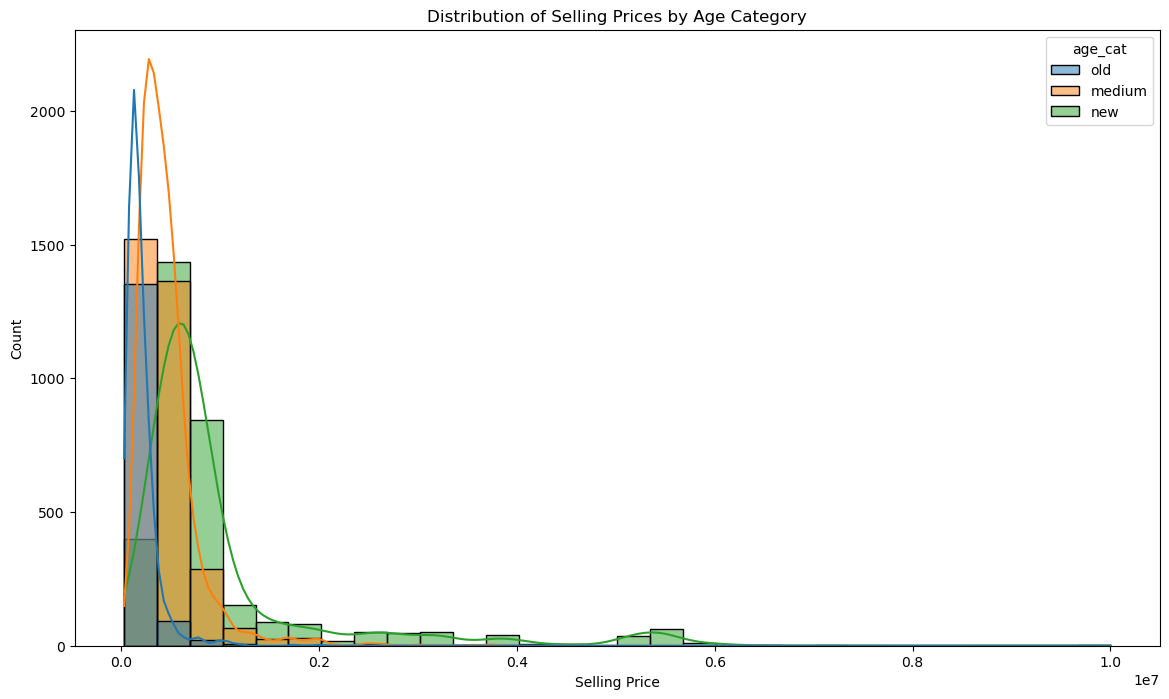

In [22]:
plt.figure(figsize=(14,8))
sns.histplot(data=df, x='selling_price', hue='age_cat', kde=True, bins=30)
plt.xlabel('Selling Price')
plt.ylabel('Count')
plt.title('Distribution of Selling Prices by Age Category')
#plt.legend(title='Age Category')
plt.show()

We observe a tendency for newer cars to be more expensive than older ones. 

What about transmission type?

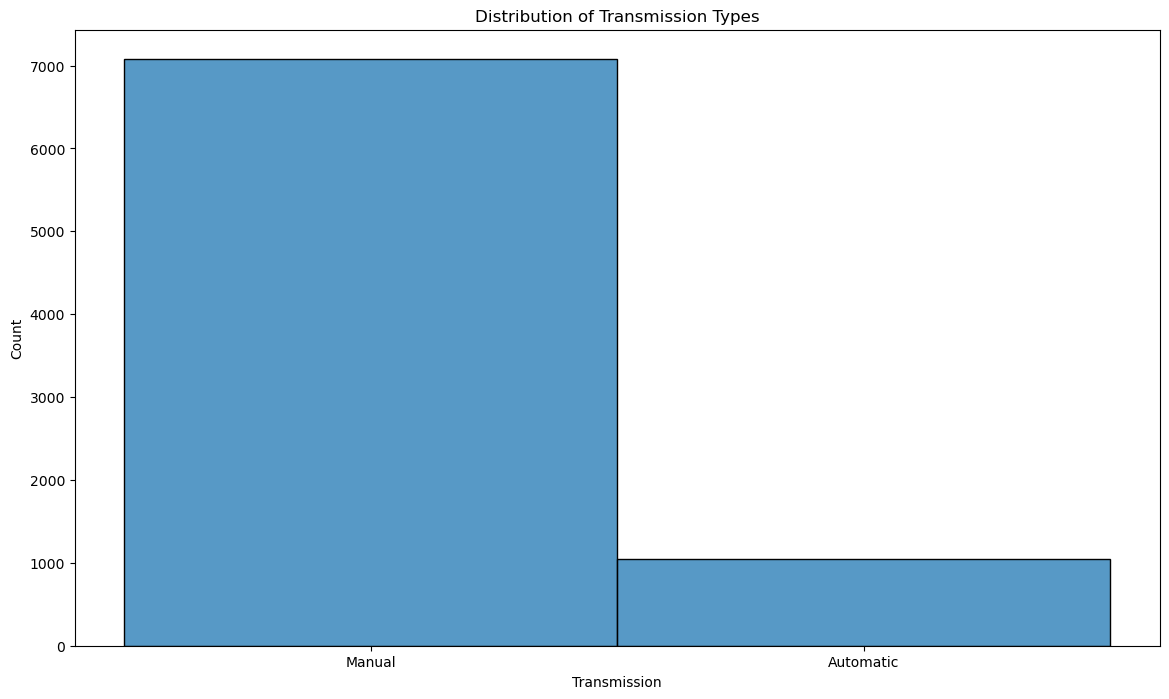

In [23]:
plt.figure(figsize=(14,8))
sns.histplot(df.transmission)
plt.xlabel('Transmission')
plt.ylabel('Count')
plt.title('Distribution of Transmission Types')
plt.show()

Most are manual transmission. Is there a relationship between the price and the type of transmission?

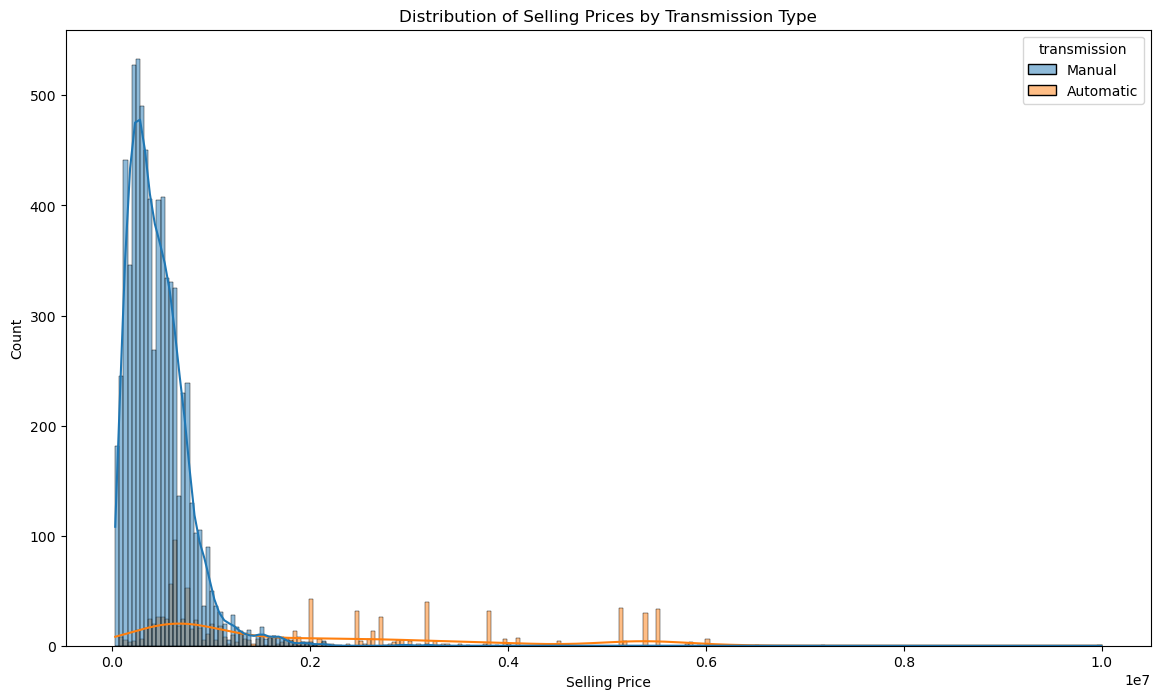

In [24]:
plt.figure(figsize=(14,8))
sns.histplot(data=df, x='selling_price', hue='transmission', kde=True)
plt.xlabel('Selling Price')
plt.ylabel('Count')
plt.title('Distribution of Selling Prices by Transmission Type')
plt.show()

Seems like the automatic transmission cars are pricier. We can see this also by computing their mean prices:

In [25]:
mean_price = df.query("transmission == 'Automatic'")['selling_price'].mean()
print(f"Mean selling price of cars with automatic transmission: {mean_price:.2f}")

Mean selling price of cars with automatic transmission: 1870827.60


In [26]:
mean_price = df.query("transmission == 'Manual'")['selling_price'].mean()
print(f"Mean selling price of cars with manual transmission: {mean_price:.2f}")

Mean selling price of cars with manual transmission: 455425.86


How about the fuel and the price?

In [27]:
df.fuel.value_counts()

fuel
Diesel    4402
Petrol    3631
CNG         57
LPG         38
Name: count, dtype: int64

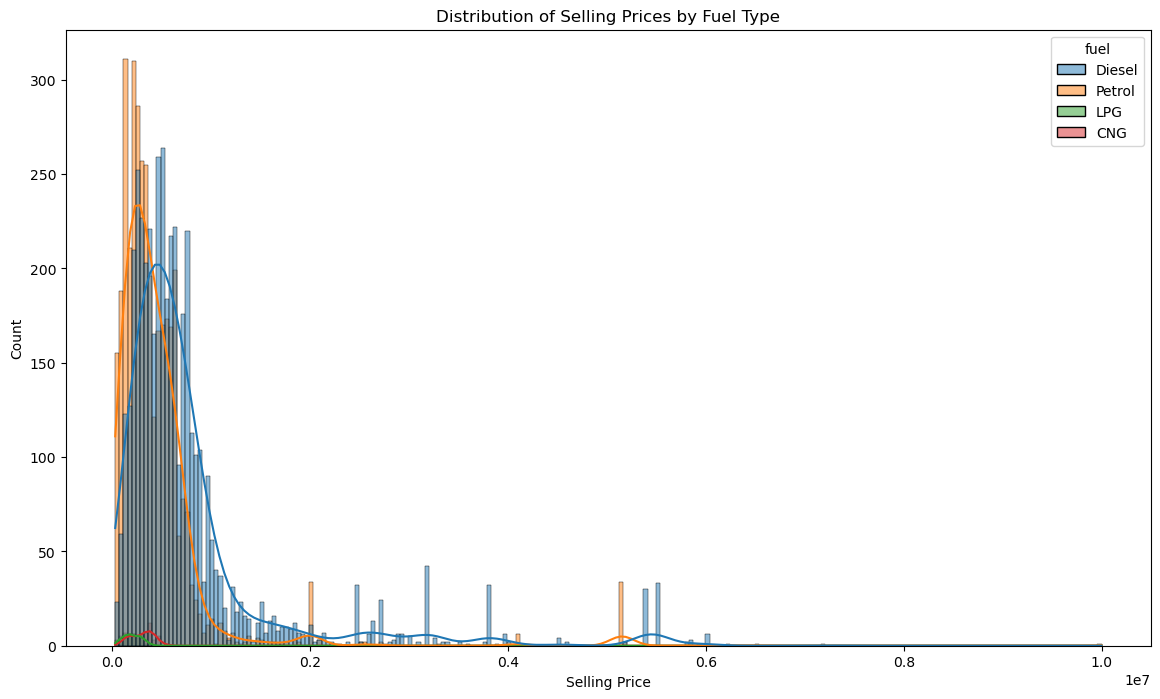

In [28]:
plt.figure(figsize=(14,8))
sns.histplot(data=df, x='selling_price', hue='fuel', kde=True)
plt.xlabel('Selling Price')
plt.ylabel('Count')
plt.title('Distribution of Selling Prices by Fuel Type')
plt.show()

## Extra: further exploration using `pandas-profiling`

As data exploration is such a fundamental component of machine learning, many tools have been created to support the process. 

`pandas-profiling` offers a quick and detailed overview of the dataset, highlighting key statistics, missing values, and feature correlations, among other insights. It's a useful tool for initial exploratory data analysis:

In [29]:
from ydata_profiling import ProfileReport

In [30]:
df.head()

name  year  selling_price  km_driven    fuel  \
0        Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3     Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4        Maruti Swift VXI BSIII  2007         130000     120000  Petrol   

  seller_type transmission         owner     mileage   engine   max_power  \
0  Individual       Manual   First Owner   23.4 kmpl  1248 CC      74 bhp   
1  Individual       Manual  Second Owner  21.14 kmpl  1498 CC  103.52 bhp   
2  Individual       Manual   Third Owner   17.7 kmpl  1497 CC      78 bhp   
3  Individual       Manual   First Owner   23.0 kmpl  1396 CC      90 bhp   
4  Individual       Manual   First Owner   16.1 kmpl  1298 CC    88.2 bhp   

                     torque  seats age_cat  
0            190Nm@ 2000rpm    5.0  medium  
1       250Nm@ 1500-2500rpm    5.0  medium  
2     12.7@ 2,700(kgm@ rpm)    5.0     old  
3  22.4 kgm at 1750-2750rpm    5.0     old  
4     11.5@ 4,500(kgm@ rpm)    5.0     old

In [31]:
ProfileReport(df, minimal=True)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Converting the features' data types

There are many other features we could investigate in a similar way. 

Before diving into modeling, it's crucial to ensure our data is in the right format. We'll convert features like mileage, engine size, and max power from text to numerical values, making them more amenable to analysis:

In [32]:
df.head()

name  year  selling_price  km_driven    fuel  \
0        Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3     Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4        Maruti Swift VXI BSIII  2007         130000     120000  Petrol   

  seller_type transmission         owner     mileage   engine   max_power  \
0  Individual       Manual   First Owner   23.4 kmpl  1248 CC      74 bhp   
1  Individual       Manual  Second Owner  21.14 kmpl  1498 CC  103.52 bhp   
2  Individual       Manual   Third Owner   17.7 kmpl  1497 CC      78 bhp   
3  Individual       Manual   First Owner   23.0 kmpl  1396 CC      90 bhp   
4  Individual       Manual   First Owner   16.1 kmpl  1298 CC    88.2 bhp   

                     torque  seats age_cat  
0            190Nm@ 2000rpm    5.0  medium  
1       250Nm@ 1500-2500rpm    5.0  medium  
2     12.7@ 2,700(kgm@ rpm)    5.0     old  
3  22.4 kgm at 1750-2750rpm    5.0     old  
4     11.5@ 4,500(kgm@ rpm)    5.0     old

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   name           8128 non-null   object  
 1   year           8128 non-null   int64   
 2   selling_price  8128 non-null   int64   
 3   km_driven      8128 non-null   int64   
 4   fuel           8128 non-null   object  
 5   seller_type    8128 non-null   object  
 6   transmission   8128 non-null   object  
 7   owner          8128 non-null   object  
 8   mileage        7907 non-null   object  
 9   engine         7907 non-null   object  
 10  max_power      7913 non-null   object  
 11  torque         7906 non-null   object  
 12  seats          7907 non-null   float64 
 13  age_cat        8128 non-null   category
dtypes: category(1), float64(1), int64(3), object(9)
memory usage: 833.7+ KB


We should convert some of the features stored as strings (`object`) to integers and floats. Specifically, the mileage, the engine size and the max power.

In [34]:
df.mileage.value_counts()

mileage
18.9 kmpl      225
19.7 kmpl      173
18.6 kmpl      164
21.1 kmpl      157
17.0 kmpl      133
              ... 
16.34 kmpl       1
19.69 kmpl       1
20.88 km/kg      1
17.8 km/kg       1
16.51 kmpl       1
Name: count, Length: 393, dtype: int64

First we remove the units:

In [35]:
df['mileage'].replace({' kmpl': '', ' km/kg': ''}, regex=True, inplace=True)

Then we convert to floats:

In [36]:
df['mileage'] = pd.to_numeric(df['mileage'])

Let's do similarly for the others:

In [37]:
df['engine'].replace({' CC': ''}, regex=True, inplace=True)
df['engine'] = pd.to_numeric(df['engine'])
df['max_power'].replace({' bhp': '', '': np.nan}, regex=True, inplace=True)
df['max_power'] = pd.to_numeric(df['max_power'])

In [38]:
df.head()

name  year  selling_price  km_driven    fuel  \
0        Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3     Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4        Maruti Swift VXI BSIII  2007         130000     120000  Petrol   

  seller_type transmission         owner  mileage  engine  max_power  \
0  Individual       Manual   First Owner    23.40  1248.0      74.00   
1  Individual       Manual  Second Owner    21.14  1498.0     103.52   
2  Individual       Manual   Third Owner    17.70  1497.0      78.00   
3  Individual       Manual   First Owner    23.00  1396.0      90.00   
4  Individual       Manual   First Owner    16.10  1298.0      88.20   

                     torque  seats age_cat  
0            190Nm@ 2000rpm    5.0  medium  
1       250Nm@ 1500-2500rpm    5.0  medium  
2     12.7@ 2,700(kgm@ rpm)    5.0     old  
3  22.4 kgm at 1750-2750rpm    5.0     old  
4     11.5@ 4,500(kgm@ rpm)    5.0     old

Rather than dealing with the heterogeneity of the torque feature, we'll simply drop it (feel free to do otherwise on your own!)

In [39]:
df.drop('torque', axis=1, inplace=True)

We'll also drop the name of the car. This is to simplify things. A better idea would be to use it to extract information about the make and model of the car. 

In [40]:
df.drop('name', axis=1, inplace=True)

This is now our data set:

In [41]:
df.head()

year  selling_price  km_driven    fuel seller_type transmission  \
0  2014         450000     145500  Diesel  Individual       Manual   
1  2014         370000     120000  Diesel  Individual       Manual   
2  2006         158000     140000  Petrol  Individual       Manual   
3  2010         225000     127000  Diesel  Individual       Manual   
4  2007         130000     120000  Petrol  Individual       Manual   

          owner  mileage  engine  max_power  seats age_cat  
0   First Owner    23.40  1248.0      74.00    5.0  medium  
1  Second Owner    21.14  1498.0     103.52    5.0  medium  
2   Third Owner    17.70  1497.0      78.00    5.0     old  
3   First Owner    23.00  1396.0      90.00    5.0     old  
4   First Owner    16.10  1298.0      88.20    5.0     old

## Feature encoding

In this section, we'll transform our categorical features into a format that's more palatable for machine learning algorithms. For features like `fuel`, `seller_type`, and `transmission`, which don't have an inherent order, we'll use one-hot encoding, which creates a new binary feature for each category. For example, the `fuel` feature has three categories: `Petrol`, `Diesel`, and `CNG`. After one-hot encoding, we'll have three new features: `fuel_Petrol`, `fuel_Diesel`, and `fuel_CNG`. If a car uses petrol, the `fuel_Petrol` feature will be 1, and the other two will be 0.

For the `owner` feature, which does have a natural order (more owners generally imply a less valuable car), we'll use ordinal encoding.

We can use Pandas to do the one hot encoding:

In [42]:
one_hot = pd.get_dummies(df['fuel'], prefix='fuel', drop_first=True)
df = pd.concat([df, one_hot], axis=1)

one_hot = pd.get_dummies(df['transmission'], prefix='transmission', drop_first=True)
df = pd.concat([df, one_hot], axis=1)

one_hot = pd.get_dummies(df['seller_type'], prefix='seller_type', drop_first=True)
df = pd.concat([df, one_hot], axis=1)

We get the following data frame:

In [43]:
df.head()

year  selling_price  km_driven    fuel seller_type transmission  \
0  2014         450000     145500  Diesel  Individual       Manual   
1  2014         370000     120000  Diesel  Individual       Manual   
2  2006         158000     140000  Petrol  Individual       Manual   
3  2010         225000     127000  Diesel  Individual       Manual   
4  2007         130000     120000  Petrol  Individual       Manual   

          owner  mileage  engine  max_power  seats age_cat  fuel_Diesel  \
0   First Owner    23.40  1248.0      74.00    5.0  medium         True   
1  Second Owner    21.14  1498.0     103.52    5.0  medium         True   
2   Third Owner    17.70  1497.0      78.00    5.0     old        False   
3   First Owner    23.00  1396.0      90.00    5.0     old         True   
4   First Owner    16.10  1298.0      88.20    5.0     old        False   

   fuel_LPG  fuel_Petrol  transmission_Manual  seller_type_Individual  \
0     False        False                 True                    True   
1     False        False                 True                    True   
2     False         True                 True                    True   
3     False        False                 True                    True   
4     False         True                 True                    True   

   seller_type_Trustmark Dealer  
0                         False  
1                         False  
2                         False  
3                         False  
4                         False

Now that we've stored the fuel and transmission information in one hot encoded vectors we can drop the original features:

In [44]:
df.drop(['fuel', 'transmission', 'seller_type'], axis=1, inplace=True)

In [45]:
df.head()

year  selling_price  km_driven         owner  mileage  engine  max_power  \
0  2014         450000     145500   First Owner    23.40  1248.0      74.00   
1  2014         370000     120000  Second Owner    21.14  1498.0     103.52   
2  2006         158000     140000   Third Owner    17.70  1497.0      78.00   
3  2010         225000     127000   First Owner    23.00  1396.0      90.00   
4  2007         130000     120000   First Owner    16.10  1298.0      88.20   

   seats age_cat  fuel_Diesel  fuel_LPG  fuel_Petrol  transmission_Manual  \
0    5.0  medium         True     False        False                 True   
1    5.0  medium         True     False        False                 True   
2    5.0     old        False     False         True                 True   
3    5.0     old         True     False        False                 True   
4    5.0     old        False     False         True                 True   

   seller_type_Individual  seller_type_Trustmark Dealer  
0                    True                         False  
1                    True                         False  
2                    True                         False  
3                    True                         False  
4                    True                         False

For `owner` we'd like to keep the ordinal relationship:

In [46]:
df.owner.value_counts()

owner
First Owner             5289
Second Owner            2105
Third Owner              555
Fourth & Above Owner     174
Test Drive Car             5
Name: count, dtype: int64

In [47]:
owner_dict = {'Test Drive Car': 0, 'First Owner': 1, 'Second Owner': 2, 'Third Owner': 3, 'Fourth & Above Owner': 4}
df.replace(owner_dict, inplace=True)

In [48]:
df.head()

year  selling_price  km_driven  owner  mileage  engine  max_power  seats  \
0  2014         450000     145500      1    23.40  1248.0      74.00    5.0   
1  2014         370000     120000      2    21.14  1498.0     103.52    5.0   
2  2006         158000     140000      3    17.70  1497.0      78.00    5.0   
3  2010         225000     127000      1    23.00  1396.0      90.00    5.0   
4  2007         130000     120000      1    16.10  1298.0      88.20    5.0   

  age_cat  fuel_Diesel  fuel_LPG  fuel_Petrol  transmission_Manual  \
0  medium         True     False        False                 True   
1  medium         True     False        False                 True   
2     old        False     False         True                 True   
3     old         True     False        False                 True   
4     old        False     False         True                 True   

   seller_type_Individual  seller_type_Trustmark Dealer  
0                    True                         False  
1                    True                         False  
2                    True                         False  
3                    True                         False  
4                    True                         False

## Setting up our $f: X \to y$

Here, we're setting the stage for our machine learning model. We'll separate the features (`X`) from the labels (`y`), essentially preparing the variables that our function $f:X \rightarrow y$ will use for learning. Think of it as gathering all the ingredients before you start cooking.

Our goal is to approximate the function mapping `X` to `y`, where `y` is the `selling_price`:

<img src="https://github.com/alu042/DAT158-2022/raw/main/notebooks/assets/f_xy.png">

In [49]:
X = df.drop('selling_price', axis=1)
y = df['selling_price']

In [50]:
X.head()

year  km_driven  owner  mileage  engine  max_power  seats age_cat  \
0  2014     145500      1    23.40  1248.0      74.00    5.0  medium   
1  2014     120000      2    21.14  1498.0     103.52    5.0  medium   
2  2006     140000      3    17.70  1497.0      78.00    5.0     old   
3  2010     127000      1    23.00  1396.0      90.00    5.0     old   
4  2007     120000      1    16.10  1298.0      88.20    5.0     old   

   fuel_Diesel  fuel_LPG  fuel_Petrol  transmission_Manual  \
0         True     False        False                 True   
1         True     False        False                 True   
2        False     False         True                 True   
3         True     False        False                 True   
4        False     False         True                 True   

   seller_type_Individual  seller_type_Trustmark Dealer  
0                    True                         False  
1                    True                         False  
2                    True                         False  
3                    True                         False  
4                    True                         False

In [51]:
y.head()

0    450000
1    370000
2    158000
3    225000
4    130000
Name: selling_price, dtype: int64

# Create training and test sets

> To stress a point repeated multiple times already: We're not interested in how well our models perform on the training set; what we're after is how well they generalize to unseen data. 

The test set is meant to simulate unseen data (and should, therefore, not be touched when constructing and tuning our models). 

<img width=50% src="https://github.com/alu042/DAT158-2022/raw/main/notebooks/assets/testsplit.png"> 

It is vital to ensure that the test set is a representative sample of the data. In our case, we want to ensure that it contains cars of all prices.

We should base our decision on how to split the data on the explorations we've done above and on what the model is supposed to be used for (as that influences the kind of generalization estimate we want). For example, perhaps it is important to use the car's age as part of the decision.  Or the number of seats it has (maybe we find it important that the test set contains at least some two-seaters). And so on. 

In our case, we'll simply ensure that the test set contains at least some expensive cars by performing a _stratified split_ on our new categorical feature representing the cars' expensiveness. In other words, we opt for a stratified split to ensure that our test set is a miniature version of our entire dataset, capturing all classes of car prices. This is crucial for the reliability of our model's performance metrics.

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=X.age_cat, random_state=42)

We now have 6096 instances for training, 2032 for testing

In [54]:
len(X_train), len(X_test)

(6096, 2032)

Their car age distributions are similar:

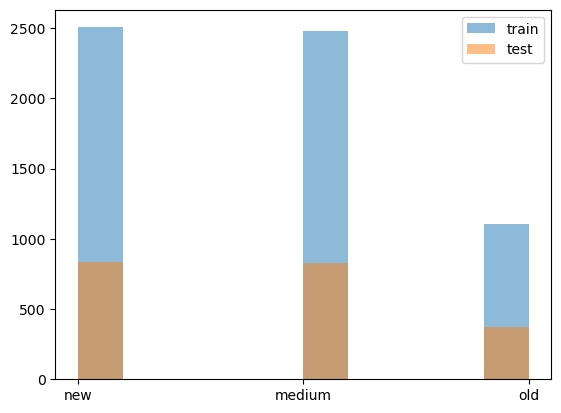

In [55]:
plt.hist(X_train.age_cat, alpha=0.5, label='train')
plt.hist(X_test.age_cat, alpha=0.5, label='test')
plt.legend(loc='upper right')
plt.show()

After making the split we can drop `age_cat` feature:

In [56]:
X_train = X_train.drop('age_cat', axis=1)
X_test = X_test.drop('age_cat', axis=1)

# Data preprocessing: Data cleaning, feature scaling and imputing missing data

Before we can use the data to train machine learning models, we need to make sure it is "clean", the features are scaled, and consider how to deal with missing data.

We know from earlier that we can scale the features using, for example, scikit-learn's `StandardScaler`. 

In [57]:
from sklearn.preprocessing import StandardScaler

A general strategy for dealing with missing data is to **impute**. In other words, insert data where there's none. This can be done in many ways, and a part of a comprehensive model selection design would. in practice. be dedicated to figuring out good imputing strategies. Sometimes, simply putting in the mean or median value calculated from all the instances having values for a given feature is an OK strategy. Other times one should try to be a bit more clever and use characteristics of the instance to decide what to put in for a missing value. For example, try to find the most similar instances in terms of the other features, then put in the mean or median value computed only from those. Or perhaps train machine learning models to perform the imputation. 

In our case, we go for a simple strategy of imputing using the mean value:

In [58]:
X_train.head()

year  km_driven  owner  mileage  engine  max_power  seats  fuel_Diesel  \
4822  2018      38817      1    27.39  1248.0       74.0    5.0         True   
1520  2012     150000      3    19.09  1396.0       69.0    5.0         True   
4622  2017      50000      1    25.80  1498.0       98.6    5.0         True   
4273  2018       2000      1    16.80  1984.0      150.0    5.0         True   
2584  2015     248000      1    24.80  1396.0       88.7    5.0         True   

      fuel_LPG  fuel_Petrol  transmission_Manual  seller_type_Individual  \
4822     False        False                 True                   False   
1520     False        False                 True                    True   
4622     False        False                 True                    True   
4273     False        False                False                   False   
2584     False        False                 True                    True   

      seller_type_Trustmark Dealer  
4822                         False  
1520                         False  
4622                         False  
4273                         False  
2584                         False

In [59]:
from sklearn.impute import SimpleImputer

# Select numerical variables
num_cols = ['year', 'km_driven', 'mileage', 'engine', 'max_power', 'seats']

# Impute missing values in numerical variables
imp = SimpleImputer(strategy='mean')
X_train[num_cols] = imp.fit_transform(X_train[num_cols])
X_test[num_cols] = imp.transform(X_test[num_cols])

In [60]:
std = StandardScaler()


In [61]:
std = StandardScaler()
X_train[num_cols] = imp.fit_transform(X_train[num_cols])
X_test[num_cols] = imp.transform(X_test[num_cols])

> **Your turn!** Explore other scaling and imputation strategies available in scikit-learn. For imputation, try these as starting points: <br><br>
https://machinelearningmastery.com/statistical-imputation-for-missing-values-in-machine-learning/<br> https://towardsdatascience.com/6-different-ways-to-compensate-for-missing-values-data-imputation-with-examples-6022d9ca0779. 

# Training a regression model

As for classification, we have a lot of choices when building our model. For now, we'll use one of the standard built-in models in scikit-learn. 

In [62]:
from sklearn.ensemble import RandomForestRegressor

In [63]:
rf_reg = RandomForestRegressor(random_state=42)

In [64]:
rf_reg.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

The model is now trained on the training data, and we can use it to make predictions for the test data:

In [65]:
y_pred = rf_reg.predict(X_test)

Here are some of the 2032 predictions from the Random Forest:

In [66]:
len(y_pred), y_pred[:10]

(2032,
 array([125576.61333333,  99559.98      , 690185.        , 653059.92      ,
        857460.        , 490842.49      , 366476.62666667, 350819.86      ,
        471369.93      , 166270.        ]))

Here are some of the correct answers:

In [67]:
len(y_test), np.array(y_test)[:10]

(2032,
 array([ 90000,  88000, 740000, 567000, 525000, 370000, 375000, 399000,
        350000, 125000], dtype=int64))

Let's put them next to each other and print out the first few:

In [68]:
list(zip(y_test, y_pred))[:10] # "Zip" the two above arrays and display the first 10

[(90000, 125576.61333333334),
 (88000, 99559.98),
 (740000, 690185.0),
 (567000, 653059.92),
 (525000, 857460.0),
 (370000, 490842.49000000005),
 (375000, 366476.6266666667),
 (399000, 350819.86),
 (350000, 471369.93),
 (125000, 166270.0)]

We observe that the model is close to correct some times, and way off for others. 

We can also make a scatter plot to compare the predicted prices agains the actual prices:

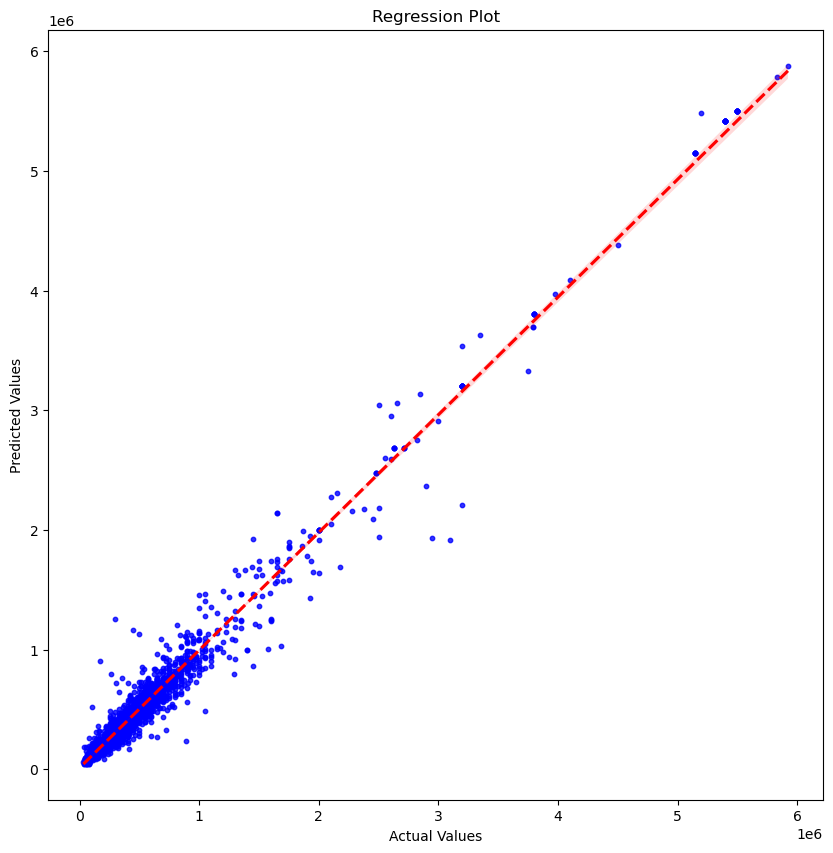

In [69]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.regplot(x=y_test, y=y_pred, scatter_kws={'color': 'blue', 's': 10}, line_kws={'color': 'red', 'linestyle': '--'})
ax.set_xlabel('Actual Values')
ax.set_ylabel('Predicted Values')
ax.set_title('Regression Plot')
plt.show()

We see that at least the model isn't terrible..

> **But how good is it, really? Can we quantify its performance?** 

As we did for classification earlier, we need metrics that we can use to evaluate our models. Again, as before, we can use these to compare different models and choice of model parameters. 

# Evaluating models / performance measures

First of all, as mentioned earlier, one should really ask, "*What is the end goal for my system"?* We're supposed to create systems that are useful in some context as part of a larger system, which typically has a higher-level goal that our system should aim to optimize. Perhaps it's worth sacrificing predictive performance for speed or not getting a lot of prices that don't lead to sales?

However, we won't consider these broader context matters in these toy problems.

We'll use a variety of metrics to evaluate our model's performance. Each metric offers a different perspective on the gaps between our predictions and the actual prices, helping us understand the strengths and weaknesses of our model. 

The basic idea underlying these performance measures in regression is to compute the distances between the predicted and actual values for all instances.

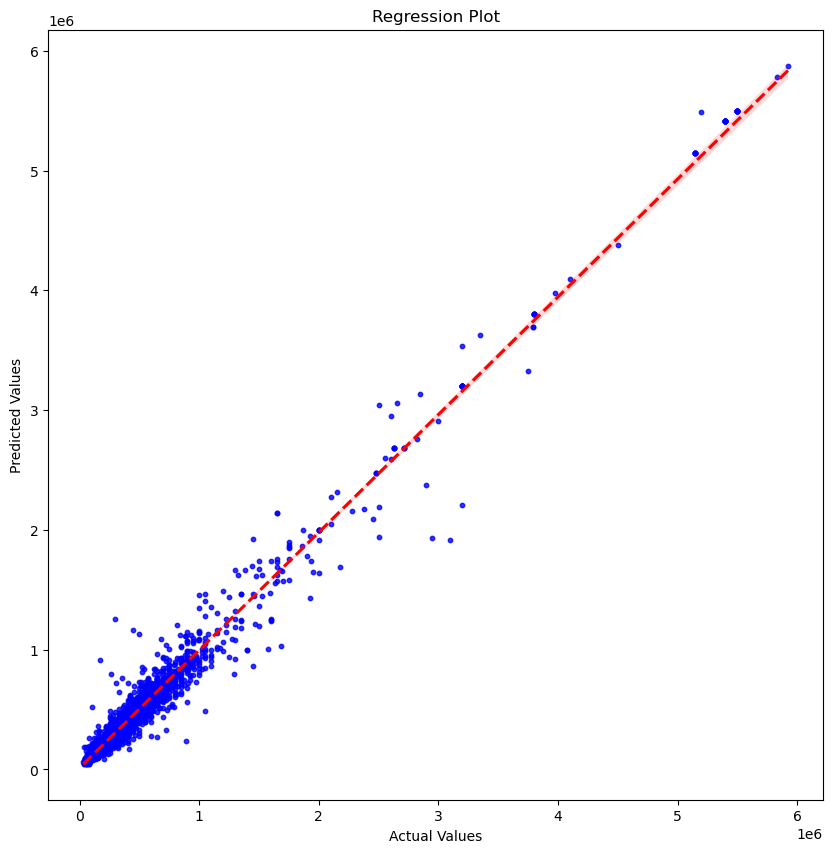

In [70]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.regplot(x=y_test, y=y_pred, scatter_kws={'color': 'blue', 's': 10}, line_kws={'color': 'red', 'linestyle': '--'})
ax.set_xlabel('Actual Values')
ax.set_ylabel('Predicted Values')
ax.set_title('Regression Plot')
plt.show()

That is, the distances from the points in the above figure and the straight line $y=x$. In other words, the **errors** in the predictions.

These distances are computed by taking the absolute value of the difference between the prediction and the target values, $|\hat{y_i} - y_i|$, where $\hat{y}_i$ is the predicted value for instance number i and $y_i$ is the true value. Technically, this is the [**euclidean distance**](https://en.wikipedia.org/wiki/Euclidean_distance).

If the predictions are perfect, all these distances will be zero. The larger the distance, the more severe the error. 

If we sum up all the distances and divide the result by the number of instances, we'll get the _average_ or _mean_ error. To avoid having the distances of the points above the line cancel out the distances of points below the line, we take the absolute value of each distance (to get a positive number). This gives us the following sum (where $n$ is the total number of instances):

$$(|\hat{y_1} - y_1| + |\hat{y_2} - y_2| + |\hat{y_3} - y_3| + ... + |\hat{y_n} - y_n|)\, / \, n$$

...which can be written as

$$\frac 1n \sum_i^n |\hat{y_i} - y_i| = MAE$$

This is the so-called **mean absolute error**. 

## Mean absolute error

Note again that if the predictions are perfect, this sum is zero.

Let's translate the above formula into code:

In [71]:
def mae(actual, predicted):
    """
    Computes the mean absolute error between the two 
    vectors actual and predicted (that are of equal length)
    """
    
    actual, predicted = np.array(actual), np.array(predicted)
    differences = np.abs(actual - predicted)
    mean_difference = np.mean(differences)
    
    return mean_difference

In [72]:
v1 = [1, 2, 0.5]
v2 = [0.9, 2, 0.3]

In [73]:
mae(v1, v2)

0.09999999999999999

We can use this to measure the performance of the above model:

In [74]:
mae(y_test, y_pred)

64719.52671418136

This is the mean absolute error achieved by our model. 

## Mean squared error and root mean squared error

Two similar measures that are widely used are **mean squared error**, which is the average of the _squared_ distances, and the **root mean squared error**, which is the square root of mean squared error. 

By squaring the distances between the points, instances where this distance is large become much more impactful on the performance measures (as the square of a large number is even larger). In other words, _outliers_ have more impact on one's performance measures, which is a good thing if outliers are important in the setting you find yourself in. 

Here they are as formulas:



$$MSE = \frac 1n \sum_i^n |\hat{y_i} - y_i|^2$$
$$RMSE = \sqrt{\frac 1n \sum_i^n |\hat{y_i} - y_i|^2}$$

And in code:

In [75]:
def mse(actual, predicted):
    """
    Computes the mean squared error between the two 
    vectors actual and predicted (that are of equal length)
    """
    
    actual, predicted = np.array(actual), np.array(predicted)
    differences = actual - predicted
    
    squared_differences = [d ** 2 for d in differences]
    mean_squared_error = sum(squared_differences) / len(actual)
    
    return mean_squared_error

In [76]:
mse(y_test, y_pred)

12813945083.770353

In [77]:
import numpy as np

def rmse(actual, predicted):
    """
    Computes the root mean squared error between the two 
    vectors actual and predicted (that are of equal length)
    """
    actual, predicted = np.array(actual), np.array(predicted)
    
    differences = actual - predicted
    squared_differences = np.square(differences)
    mean_squared_error = np.mean(squared_differences)
    root_mean_squared_error = np.sqrt(mean_squared_error)
    
    return root_mean_squared_error

In [78]:
rmse(y_test, y_pred)

113198.69735898185

## `R^2`: The coefficient of determination

The _coefficient of determination_ is another way to measure the distance between the predicted labels and the true labels in our test set. It is computed from two quantities: the *residual sum of squares* **$SS_{res}$** and the *total sum of squares* **$SS_{tot}$**:

$$
\begin{align}
SS_{res} &= \sum_i (y_i - \hat{y}_i)^2 \\
SS_{tot} &= \sum_i (y_i - \bar{y})^2,
\end{align}
$$
where $\bar{y}$ is the mean of the label values:
$$
\bar{y} = \frac1n \sum_i y_i
$$

The formula for $R^2$ is then:

$$R^2 = 1 - \frac{SS_{res}}{SS_{tot}}$$

Note that if the predictions agree perfectly with the labels then $R^2 = 1$. If a model always predicts $\bar{y}$, then it has $R^2 = 0$. A model that performs worse than this will have a negative $R^2$ value.

In [79]:
def r2(y, yhat):
    """
    Computes the R-squared value between the two 
    vectors y and yhat (that are of equal length)
    """
    y_mean = np.mean(y)
    ss_res = np.sum((y - yhat)**2)
    ss_tot = np.sum((y - y_mean)**2)
    r2 = 1 - ss_res/ss_tot
    
    return r2

In [80]:
r2(y_test, y_pred)

0.978614145800325

## In scikit learn

These metrics are extremely standard and can therefore of course also be found in scikit-learn. It's not necessary to make your own implementation.

In [81]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [82]:
# MAE
mean_absolute_error(y_test, y_pred)

64719.52671418136

In [83]:
# MSE
mean_squared_error(y_test, y_pred, squared=True)

12813945083.770365

In [84]:
# RMSE
mean_squared_error(y_test, y_pred, squared=False)

113198.69735898185

In [85]:
# R2
r2_score(y_test, y_pred)

0.978614145800325

## Other models

Now that we've seen how our initial model performs, let's explore how other models stack up. We'll look at _Linear Regression_, _ElasticNet_, and _Gradient Boosting Regressor_ to see if any of them offer a significant advantage. Have a look at the scikit-learn documentation for more information (and inspiration): https://scikit-learn.org/stable/supervised_learning.html#supervised-learning 

### Logistic regression

In [86]:
from sklearn.linear_model import LinearRegression

In [87]:
lr = LinearRegression()
lr.fit(X_train, y_train) 

LinearRegression()

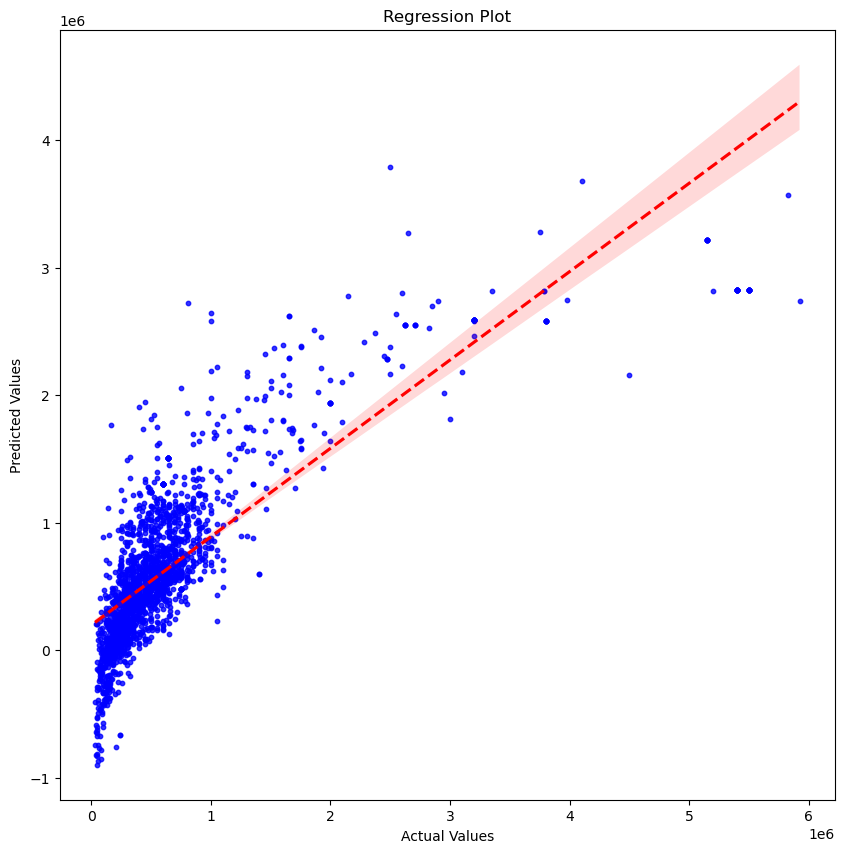

In [88]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.regplot(x=y_test, y=lr.predict(X_test), scatter_kws={'color': 'blue', 's': 10}, line_kws={'color': 'red', 'linestyle': '--'})
ax.set_xlabel('Actual Values')
ax.set_ylabel('Predicted Values')
ax.set_title('Regression Plot')
plt.show()

In [89]:
# MAE
mean_absolute_error(y_test, lr.predict(X_test))

280051.9233840075

In [90]:
# MSE
mean_squared_error(y_test, lr.predict(X_test), squared=True)

206381983777.8061

In [91]:
# RMSE
mean_squared_error(y_test, lr.predict(X_test), squared=False)

454292.8392323679

In [92]:
# R2
r2_score(y_test, lr.predict(X_test))

0.6555584571607063

### ElasticNet

In [93]:
from sklearn.linear_model import ElasticNet

In [94]:
en = ElasticNet()
en.fit(X_train, y_train)

ElasticNet()

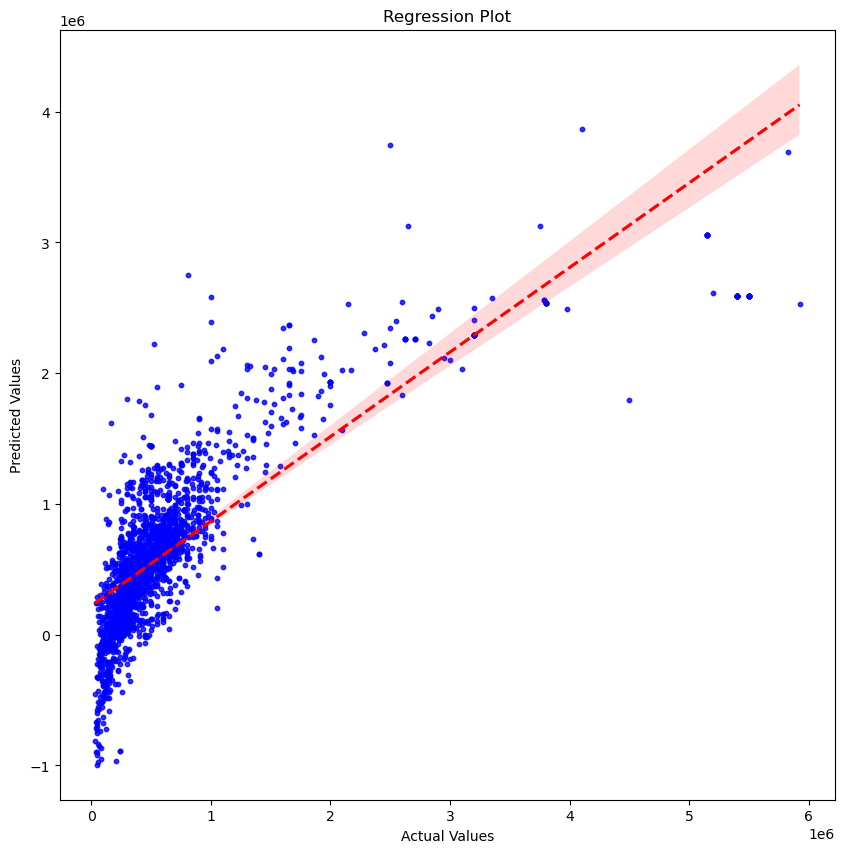

In [95]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.regplot(x=y_test, y=en.predict(X_test), scatter_kws={'color': 'blue', 's': 10}, line_kws={'color': 'red', 'linestyle': '--'})
ax.set_xlabel('Actual Values')
ax.set_ylabel('Predicted Values')
ax.set_title('Regression Plot')
plt.show()

In [96]:
# MAE
mean_absolute_error(y_test, en.predict(X_test))

284663.7809405611

In [97]:
# MSE
mean_squared_error(y_test, en.predict(X_test), squared=True)

224919481128.79196

In [98]:
# RMSE
mean_squared_error(y_test, en.predict(X_test), squared=False)

474256.76708803215

In [99]:
# R2
r2_score(y_test, en.predict(X_test))

0.6246202712247325

### Gradient Boosting

In [100]:
from sklearn.ensemble import GradientBoostingRegressor

In [101]:
gb = GradientBoostingRegressor(n_estimators=500, max_depth=4, learning_rate=0.2)
gb.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.2, max_depth=4, n_estimators=500)

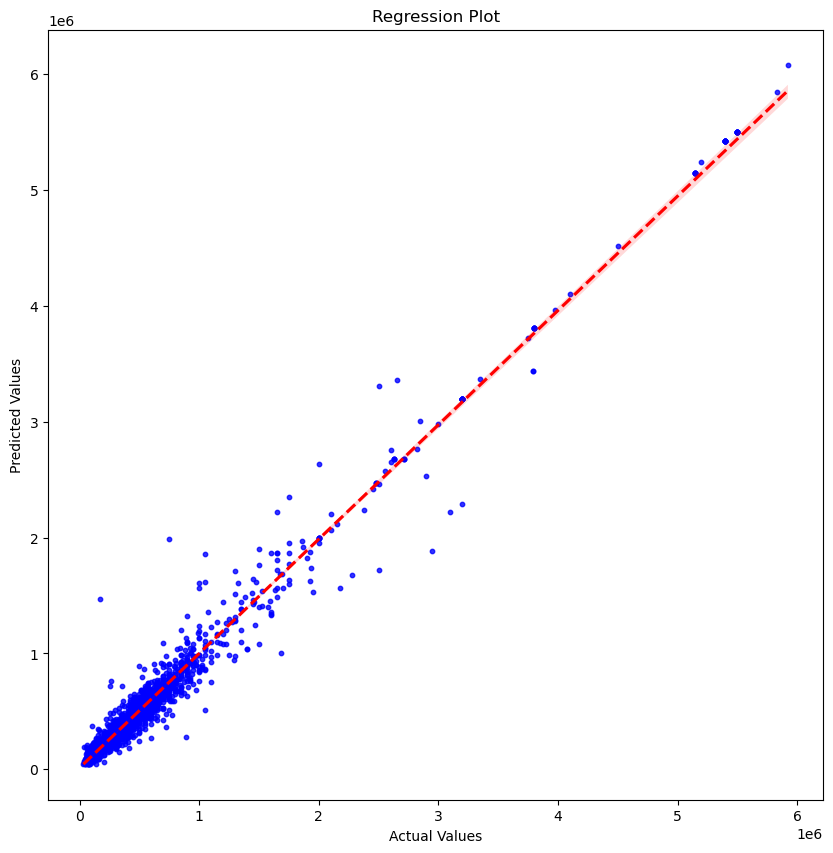

In [102]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.regplot(x=y_test, y=gb.predict(X_test), scatter_kws={'color': 'blue', 's': 10}, line_kws={'color': 'red', 'linestyle': '--'})
ax.set_xlabel('Actual Values')
ax.set_ylabel('Predicted Values')
ax.set_title('Regression Plot')
plt.show()

In [103]:
# MAE
mean_absolute_error(y_test, gb.predict(X_test))

63026.4911310148

In [104]:
# MSE
mean_squared_error(y_test, gb.predict(X_test), squared=True)

13150689008.572857

In [105]:
# RMSE
mean_squared_error(y_test, gb.predict(X_test), squared=False)

114676.45359258742

In [106]:
# R2
r2_score(y_test, gb.predict(X_test))

0.9780521364869268

## Comparing the models

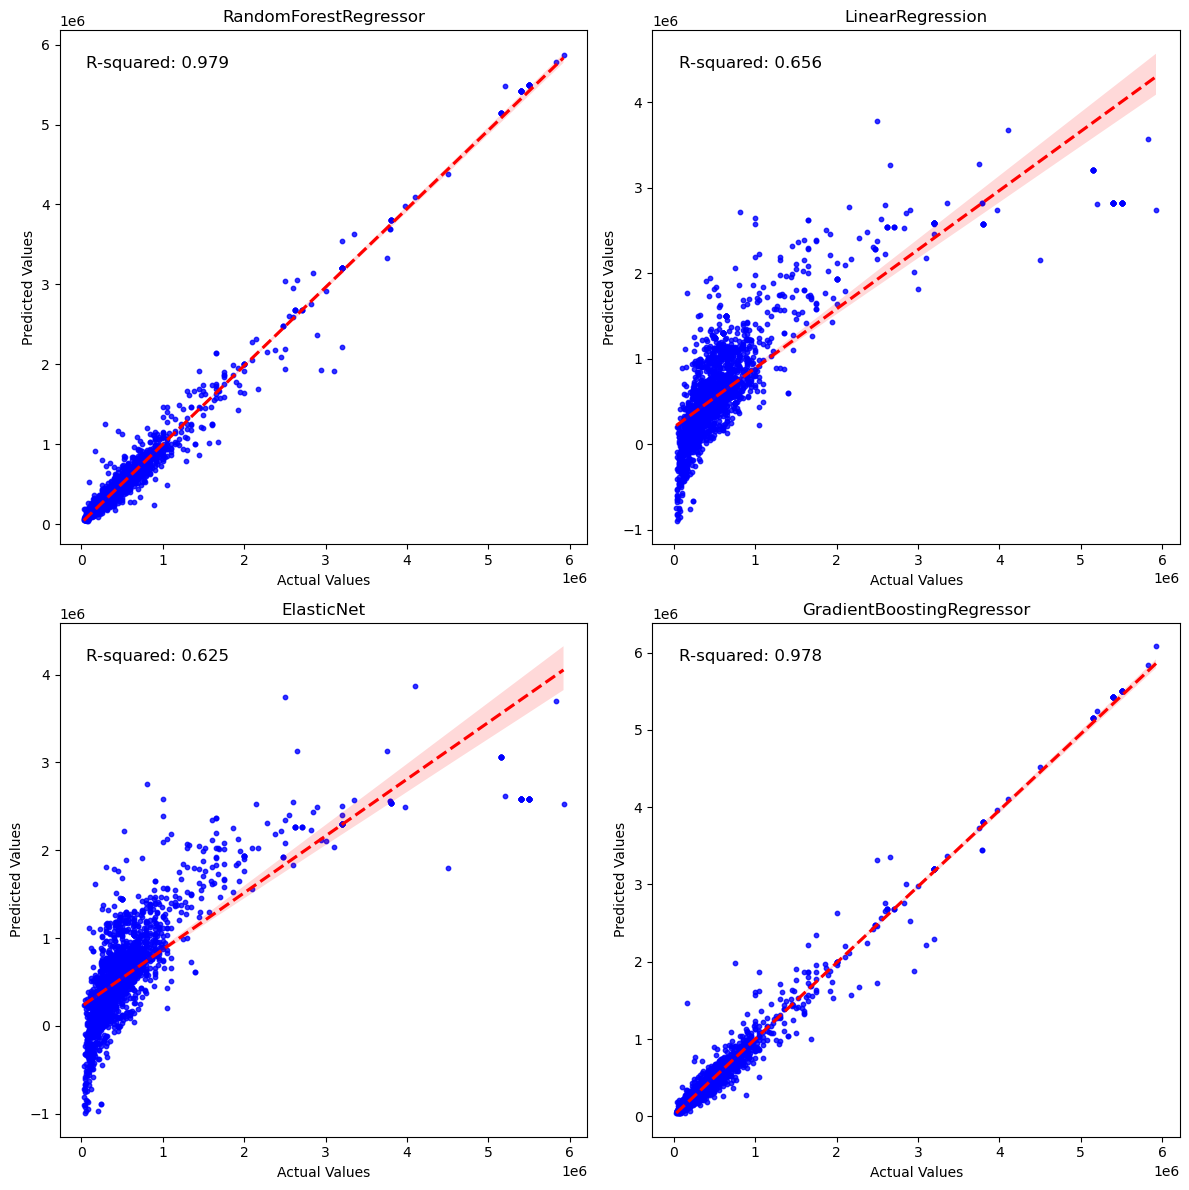

In [107]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))

for model, ax in zip([rf_reg, lr, en, gb], axes.flatten()):
    y_pred = model.predict(X_test)
    sns.regplot(x=y_test, y=y_pred, ax=ax, scatter_kws={'color': 'blue', 's': 10}, line_kws={'color': 'red', 'linestyle': '--'})
    ax.set_xlabel('Actual Values')
    ax.set_ylabel('Predicted Values')
    ax.set_title(type(model).__name__)
    r2_score = r2(y_test, y_pred)
    ax.text(0.05, 0.95, f'R-squared: {r2_score:.3f}', transform=ax.transAxes, fontsize=12, verticalalignment='top')

plt.tight_layout()
plt.show()

# Wrapping up

In this notebook, we've stepped through some essentials of machine learning regression models. We started by framing the problem, understanding the data, and then prepared the data via feature encoding, scaling, and imputation. We then trained various models and evaluated their performance using some standard metrics.

The skills you've picked up here can help you in your work on Assignment #1. There you'll have the opportunity to apply these concepts in a more complex scenario: predicting a patient's length-of-stay in hospital. This will allow you to deepen your understanding and hone your skills in constructing and fine-tuning regression models for real-world applications.

In the next notebook, we'll take a look at *hyperparameter optimization*. 